The plot of the Retweet network with node size showing their betweenness centrality, with a one-paragraph description of how your betweenness approximation function works.

In [65]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib import cm, colors
ig.config["plotting.backend"] = "matplotlib"

def plot_graph(g):
    degrees = g.degree()
    betweenness = g.betweenness()
    
    # Calculate visual properties
    vertex_size = [max(5, 5 * np.log(1 + degree)) for degree in degrees]
    edge_width = [0.3 for _ in g.es]
    
    # Normalize betweenness for color scaling using a log scale
    if betweenness:
        betweenness = [b + 1e-9 for b in betweenness]
        log_betweenness = np.log10(betweenness)
        min_log_bet = min(log_betweenness)
        max_log_bet = max(log_betweenness)
        normalized_betweenness = [
            (b - min_log_bet) / (max_log_bet - min_log_bet) if max_log_bet > min_log_bet else 0.5 for b in log_betweenness
        ]
    else:
        normalized_betweenness = [0.5] * len(g.vs)  # Default to 0.5 if no betweenness values
    
    # Create a colormap and map normalized betweenness to colors
    cmap = cm.viridis  # You can choose other colormaps like 'plasma', 'inferno', etc.
    vertex_color = [colors.to_hex(cmap(b)) for b in normalized_betweenness]
    layout = g.layout_fruchterman_reingold(niter=1000)
    layout_array = np.array(layout.coords)
    layout = ig.Layout(layout_array.tolist())
    
    # Plot settings
    visual_style = {
        "vertex_size": vertex_size,
        "vertex_color": vertex_color,
        "vertex_label": None,
        "edge_width": edge_width,
        "edge_color": "rgba(136, 136, 136, 0.3)",
        "layout": layout,
        "bbox": (4000, 2000),
        "margin": 200,
        "vertex_frame_color": "#444444",
        "vertex_frame_width": 0.5,
    }
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title("Vertex size related to the degree")
    ig.plot(
        g, 
        target=ax,
        **visual_style
    )
    
    norm = colors.Normalize(vmin=min_log_bet, vmax=max_log_bet)  # Normalize the log-scaled values
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    # Add the colorbar to the plot
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_label('Log10(Betweenness Centrality)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    
    # Add a text box to describe the vertex size relationship
    text_x = -1.2 * max(layout_array[:, 0])  # Position the text on the left of the plot
    text_y = 1.2 * max(layout_array[:, 1])  # Position the text above the plot
    ax.text(
        text_x, text_y,
        "",
        fontsize=14,
        color="black",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
        horizontalalignment="left",
        verticalalignment="center",
    )
    
    plt.show()

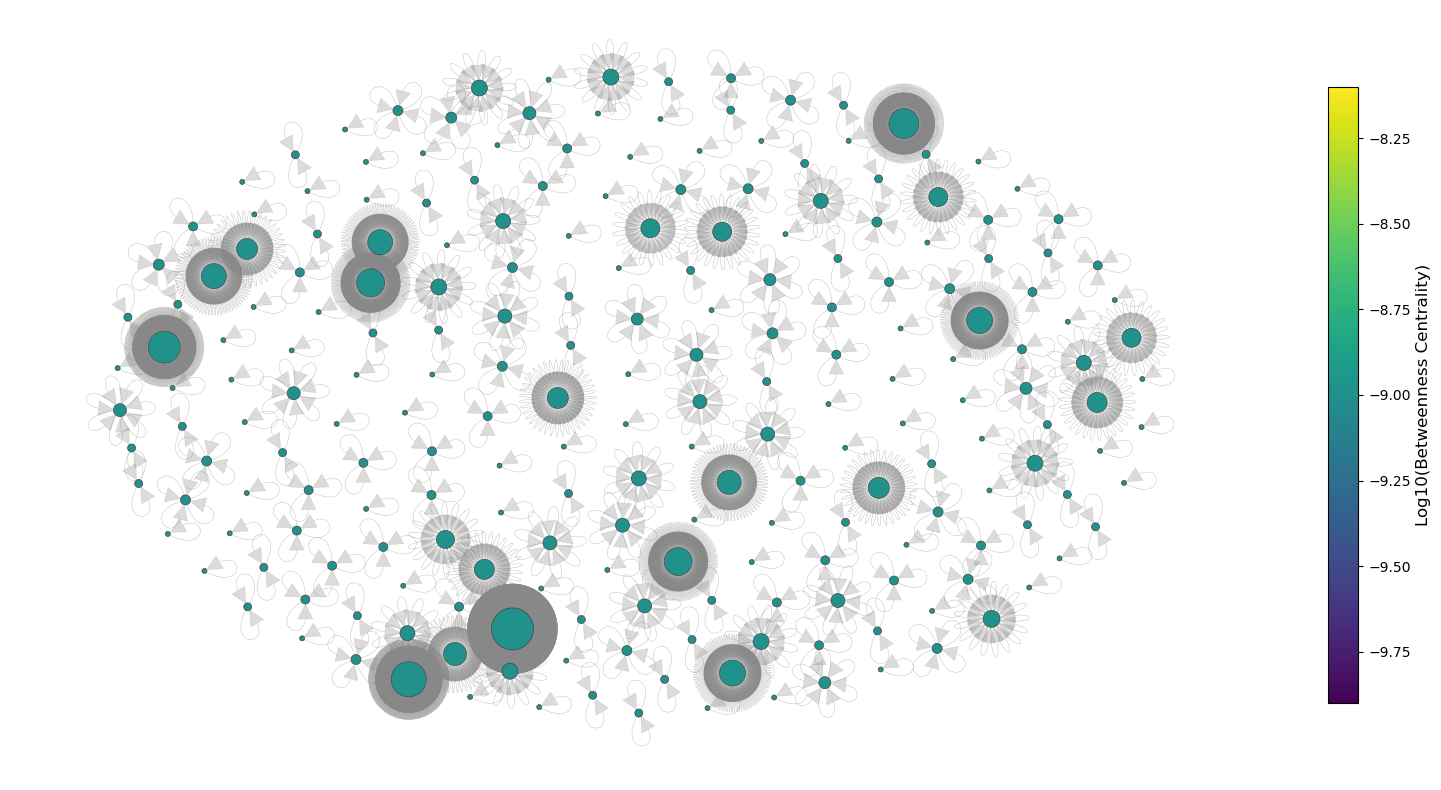

In [39]:
g = ig.Graph.Read("reply_network.pickle", format="pickle")
plot_graph(g)

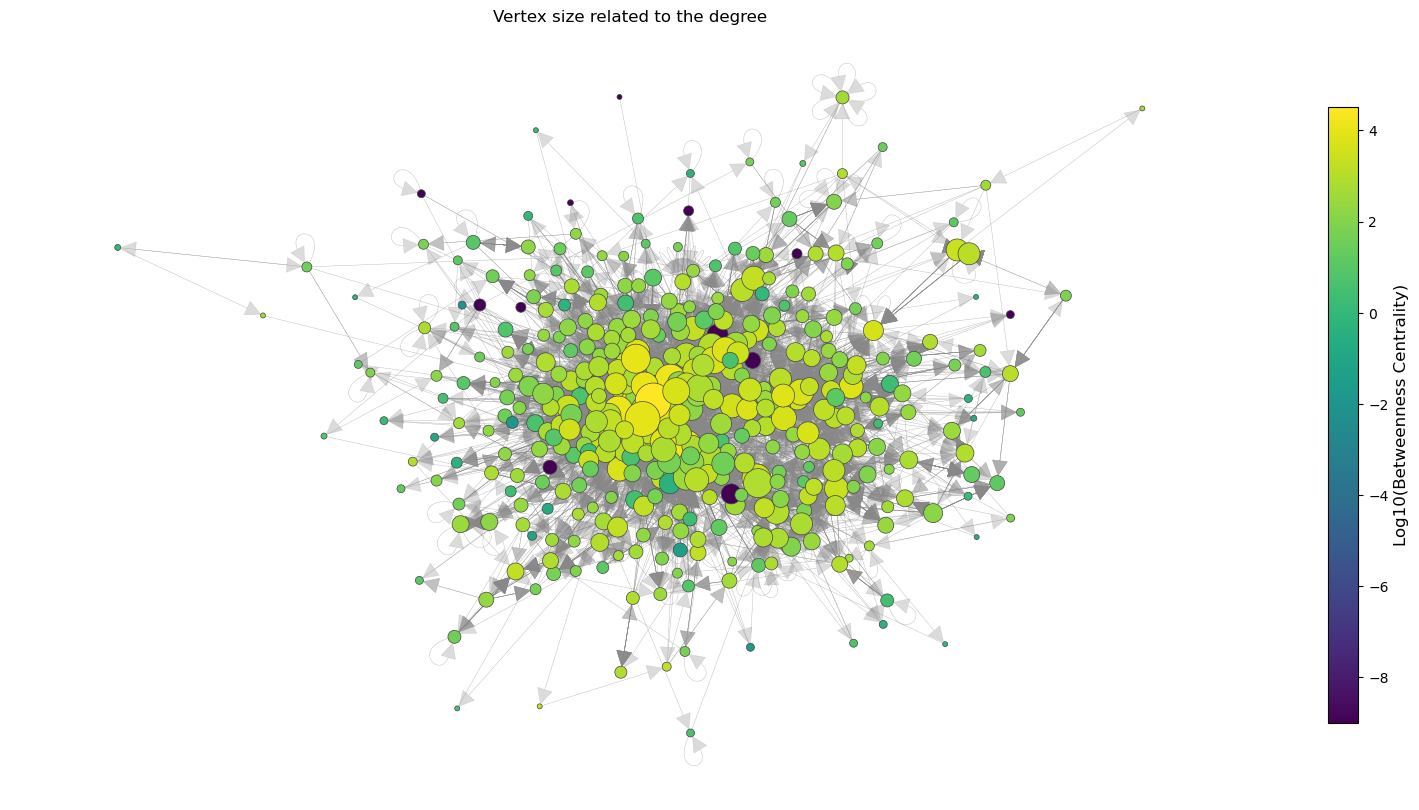

In [67]:
g = ig.Graph.Read("filtered_reply_network.pickle", format="pickle")
plot_graph(g)

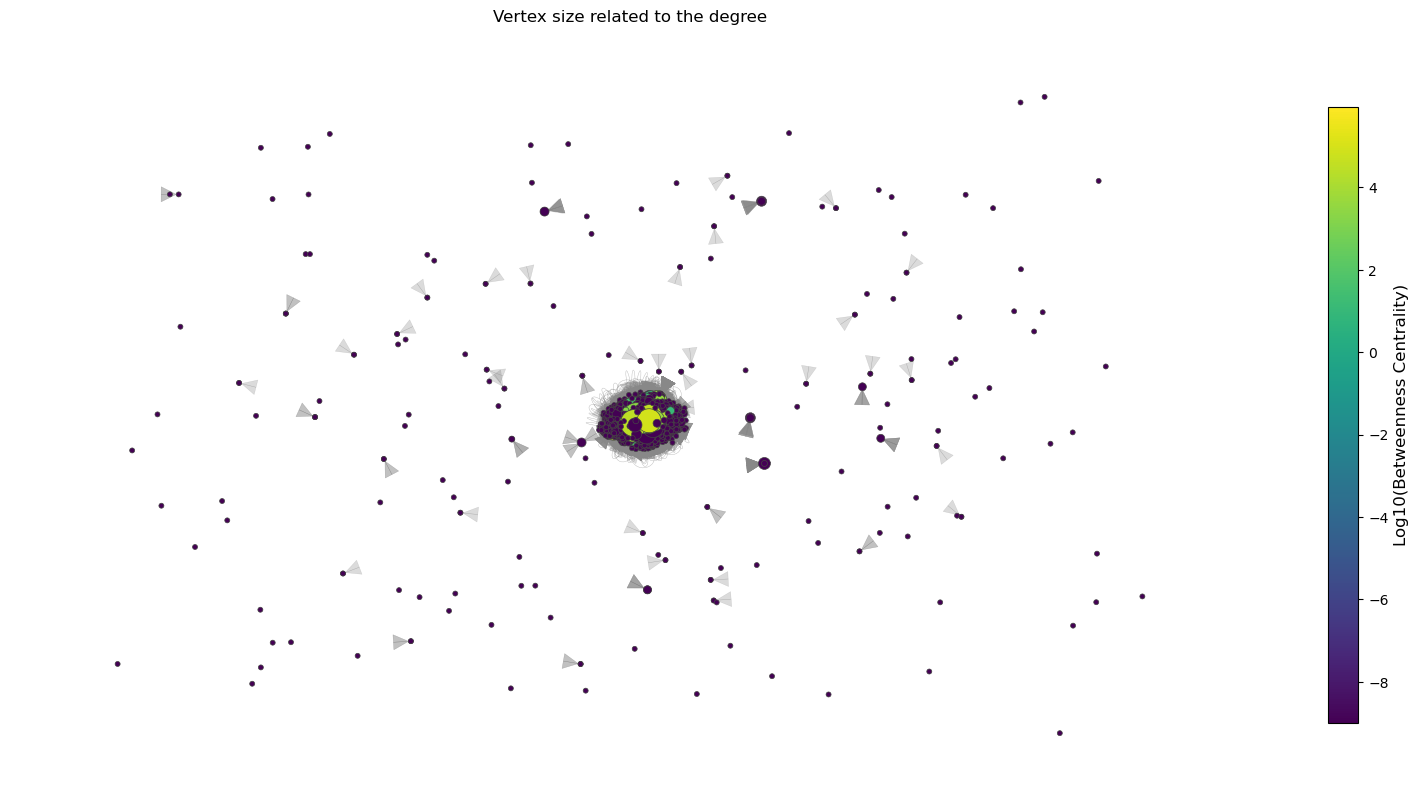

In [68]:
g = ig.Graph.Read("retweet_network.pickle", format="pickle")
plot_graph(g)

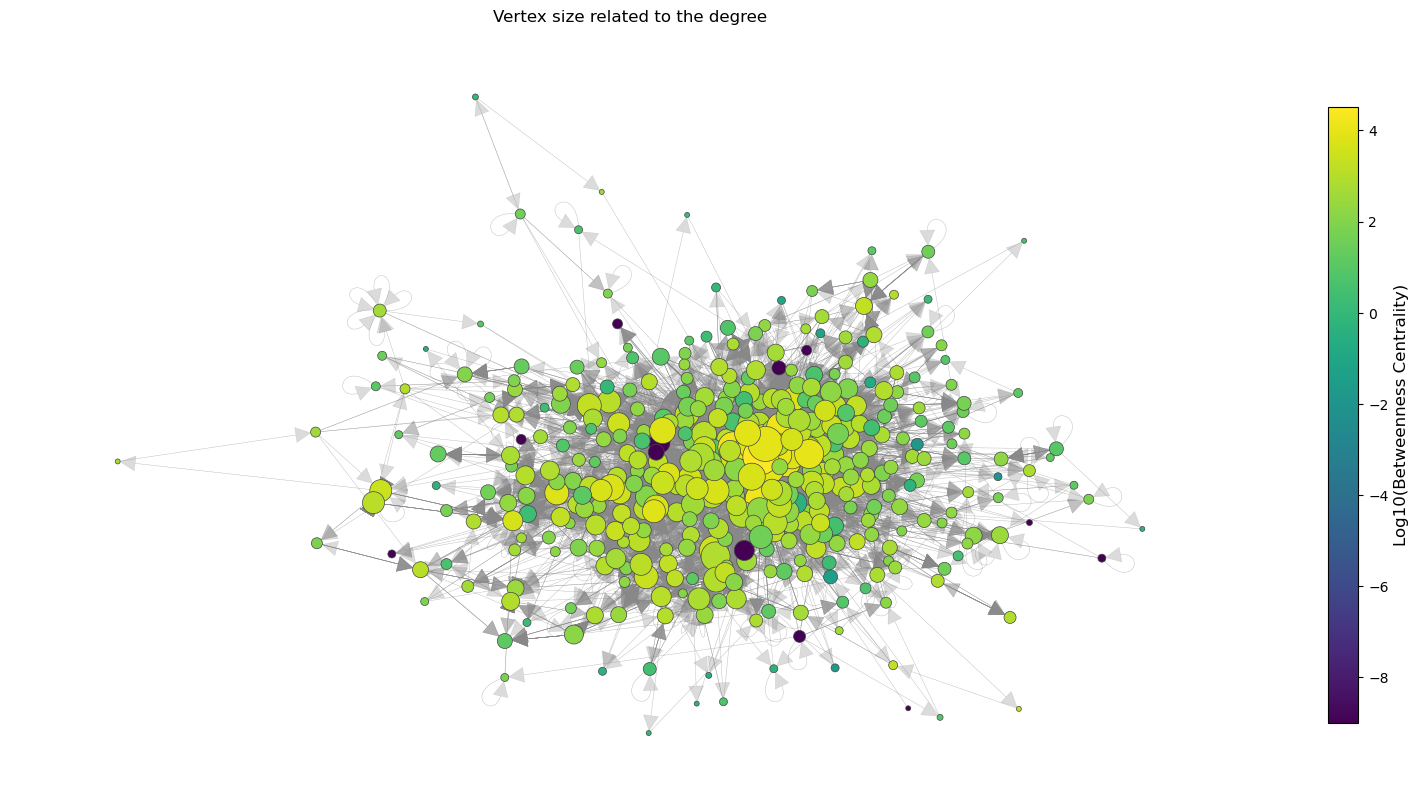

In [69]:
g = ig.Graph.Read("filtered_retweet_network.pickle", format="pickle")
plot_graph(g)

Betweenness in a graph measures how important a node or edge is in connecting different parts of the network. It looks at how often a node or edge appears on the shortest paths between other pairs of nodes. If a node is frequently used as a bridge to connect other nodes, it has high betweenness. This means it plays a key role in transferring information, in a social network, a person with high betweenness might be someone who connects two otherwise separate groups of people, making them a crucial link for communication or collaboration.